# Bushfire Classification

Abdulaziz 24572378


## Connecting to Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import os

Mounted at /content/drive


In [ ]:
fire_path = '/content/drive/MyDrive/ML-A2-data/fire_dataset/fire_images'
non_fire_path = '/content/drive/MyDrive/ML-A2-data/fire_dataset/non_fire_images'
output_path = '/content/drive/MyDrive/ML-A2-data/fire_dataset/resized_images'

## Resizing the images

In [ ]:


def resize_and_pad_image(image_path, target_size=(224, 224)):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error reading image: {image_path}")
            return

        h, w, _ = image.shape

        # Calculate the padding needed to make the image square
        delta_width = max(0, h - w)
        delta_height = max(0, w - h)
        top, bottom = delta_height // 2, delta_height - (delta_height // 2)
        left, right = delta_width // 2, delta_width - (delta_width // 2)

        # Create a border around the image with the calculated padding
        color = [0, 0, 0]  # Black color for padding
        image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

        # Resize the image to the target size
        image = cv2.resize(image, target_size)

        return image
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(e)
        return None


In [ ]:
def process_images(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        if filename.endswith(('.png')):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)
            resized_image = resize_and_pad_image(input_path, target_size=(224, 224))
            # resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
            cv2.imwrite(output_path, resized_image)


In [ ]:
  process_images(fire_path, os.path.join(output_path, 'fire'))



In [ ]:
  process_images(non_fire_path, os.path.join(output_path, 'non_fire'))


## Visualising images

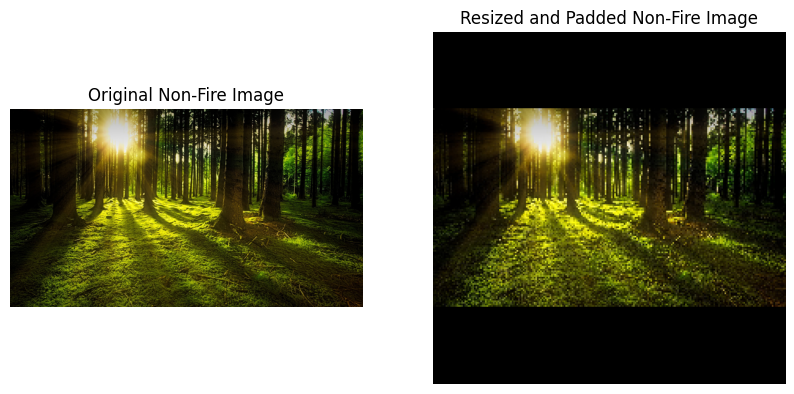

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and display the original non-fire image
original_non_fire_image_path = os.path.join(non_fire_path, os.listdir(non_fire_path)[232])
original_non_fire_image = cv2.imread(original_non_fire_image_path)
original_non_fire_image = cv2.cvtColor(original_non_fire_image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Non-Fire Image')
plt.imshow(original_non_fire_image)
plt.axis('off')

# Load and display the resized and padded non-fire image
resized_non_fire_image_path = os.path.join(output_path, 'non_fire', os.listdir(output_path + '/non_fire')[232])
resized_non_fire_image = cv2.imread(resized_non_fire_image_path)
resized_non_fire_image = cv2.cvtColor(resized_non_fire_image, cv2.COLOR_BGR2RGB)


plt.subplot(1, 2, 2)
plt.title('Resized and Padded Non-Fire Image')
plt.imshow(resized_non_fire_image)
plt.axis('off')

plt.show()


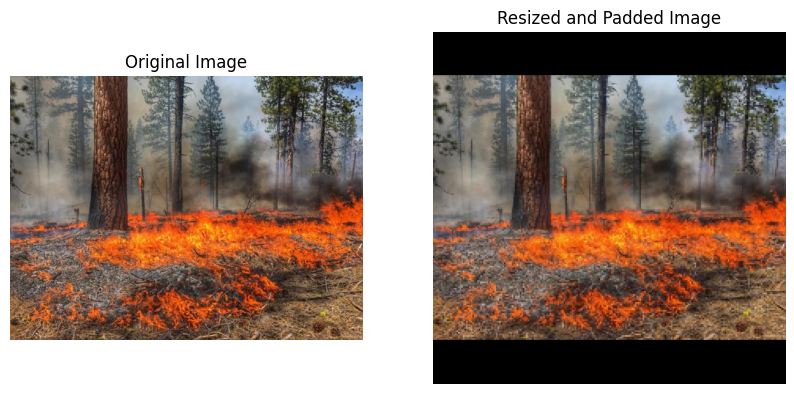

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load and display the original image
original_image_path = os.path.join(fire_path, os.listdir(fire_path)[60])
original_image = cv2.imread(original_image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

# Load and display the resized and padded image
resized_image_path = os.path.join(output_path, 'fire', os.listdir(output_path + '/fire')[60])
resized_image = cv2.imread(resized_image_path)
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)



plt.subplot(1, 2, 2)
plt.title('Resized and Padded Image')
plt.imshow(resized_image)
plt.axis('off')

plt.show()


## Labelling and splitting the data

In [ ]:
# Count the number of images in each folder
num_original_fire_images = len(os.listdir(fire_path))
num_original_non_fire_images = len(os.listdir(non_fire_path))
num_resized_fire_images = len(os.listdir('/content/drive/MyDrive/ML-A2-data/fire_dataset/resized_images/fire'))
num_resized_non_fire_images = len(os.listdir('/content/drive/MyDrive/ML-A2-data/fire_dataset/resized_images/non_fire'))

# Print the counts
print(f"Number of original fire images: {num_original_fire_images}")
print(f"Number of original non-fire images: {num_original_non_fire_images}")
print(f"Number of resized fire images: {num_resized_fire_images}")
print(f"Number of resized non-fire images: {num_resized_non_fire_images}")


Number of original fire images: 755
Number of original non-fire images: 243
Number of resized fire images: 755
Number of resized non-fire images: 243


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Define a function to load and preprocess images
def load_images(path):
    images = []
    labels = []
    for class_folder in os.listdir(path):
        class_path = os.path.join(path, class_folder)
        class_label = 1 if class_folder == 'fire' else 0  # Assign labels, e.g., 1 for fire and 0 for non-fire
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(class_label)
    return np.array(images), np.array(labels)

# Load and preprocess the images
Images, Labels = load_images(output_path)


In [ ]:
# Count the occurrences of each label
label_counts = np.bincount(Labels)

# Print the counts
print("Label 0 count (non-fire):", label_counts[0])
print("Label 1 count (fire):", label_counts[1])


Label 0 count (non-fire): 243
Label 1 count (fire): 755


In [ ]:
# Split the pdata into train (70%), validation (20%), and test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=1/3, random_state=42)

## (1) training on Lrelu and sigmoid

In [ ]:
# Updated code with Leaky ReLU activation
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional layers with Leaky ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layers with Leaky ReLU activation
model.add(layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
Binary = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
22/22 [==============================] - 3s 94ms/step - loss: 332.5547 - accuracy: 0.7951 - val_loss: 0.7114 - val_accuracy: 0.9550
Epoch 2/10
22/22 [==============================] - 2s 75ms/step - loss: 4.6145 - accuracy: 0.8854 - val_loss: 1.1905 - val_accuracy: 0.9350
Epoch 3/10
22/22 [==============================] - 2s 74ms/step - loss: 9.1348 - accuracy: 0.8539 - val_loss: 0.7824 - val_accuracy: 0.9600
Epoch 4/10
22/22 [==============================] - 2s 74ms/step - loss: 0.8976 - accuracy: 0.9542 - val_loss: 2.8712 - val_accuracy: 0.8950
Epoch 5/10
22/22 [==============================] - 2s 75ms/step - loss: 18.3136 - accuracy: 0.8481 - val_loss: 1.2408 - val_accuracy: 0.9750
Epoch 6/10
22/22 [==============================] - 1s 68ms/step - loss: 1.9121 - accuracy: 0.9255 - val_loss: 4.2657 - val_accuracy: 0.8950
Epoch 7/10
22/22 [==============================] - 1s 68ms/step - loss: 5.7057 - accuracy: 0.9140 - val_loss: 0.6972 - val_accuracy: 0.9750
Epoch 8/10

4/4 [==============================] - 0s 30ms/step
Accuracy: 0.97
Precision: 0.9620253164556962
Recall: 1.0
F1-Score: 0.9806451612903226
ROC AUC: 0.9358552631578947
Confusion Matrix:
[[21  3]
 [ 0 76]]


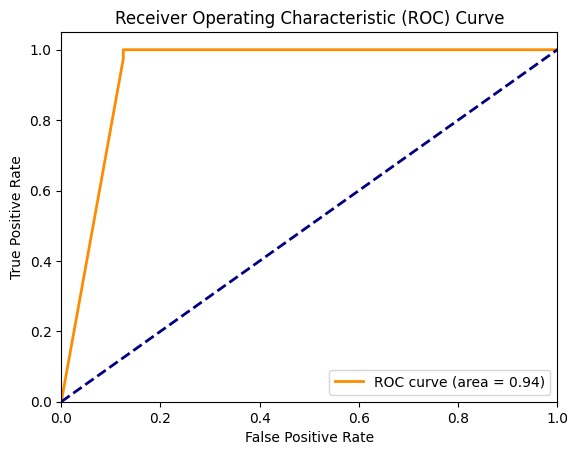

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

predictions = model.predict(X_test)  # Replace X_test with your test data
rounded_predictions = np.round(predictions)  # Convert to 0 or 1

# True labels
true_labels = y_test  # Replace y_test with your true labels

# Accuracy
accuracy = accuracy_score(true_labels, rounded_predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(true_labels, rounded_predictions)
print("Precision:", precision)

# Recall
recall = recall_score(true_labels, rounded_predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(true_labels, rounded_predictions)
print("F1-Score:", f1)

# ROC AUC
roc_auc = roc_auc_score(true_labels, predictions)
print("ROC AUC:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(true_labels, rounded_predictions)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## (2) training on Relu & sigmoid

In [ ]:
#OLDDDDDD deprecated code
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  #
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
Binary = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
22/22 [==============================] - 19s 123ms/step - loss: 50.6221 - accuracy: 0.7135 - val_loss: 0.2585 - val_accuracy: 0.8550
Epoch 2/10
22/22 [==============================] - 1s 58ms/step - loss: 0.2408 - accuracy: 0.9083 - val_loss: 0.3475 - val_accuracy: 0.8800
Epoch 3/10
22/22 [==============================] - 1s 56ms/step - loss: 0.1589 - accuracy: 0.9327 - val_loss: 0.1687 - val_accuracy: 0.9350
Epoch 4/10
22/22 [==============================] - 1s 55ms/step - loss: 0.1535 - accuracy: 0.9241 - val_loss: 0.1800 - val_accuracy: 0.9200
Epoch 5/10
22/22 [==============================] - 1s 57ms/step - loss: 0.1747 - accuracy: 0.9527 - val_loss: 0.1422 - val_accuracy: 0.9500
Epoch 6/10
22/22 [==============================] - 2s 69ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.2317 - val_accuracy: 0.9300
Epoch 7/10
22/22 [==============================] - 2s 73ms/step - loss: 0.0352 - accuracy: 0.9871 - val_loss: 0.2099 - val_accuracy: 0.9550
Epoch 8/10

4/4 [==============================] - 0s 18ms/step
Accuracy: 0.94
Precision: 0.926829268292683
Recall: 1.0
F1-Score: 0.9620253164556963
ROC AUC: 0.9989035087719298
Confusion Matrix:
[[18  6]
 [ 0 76]]


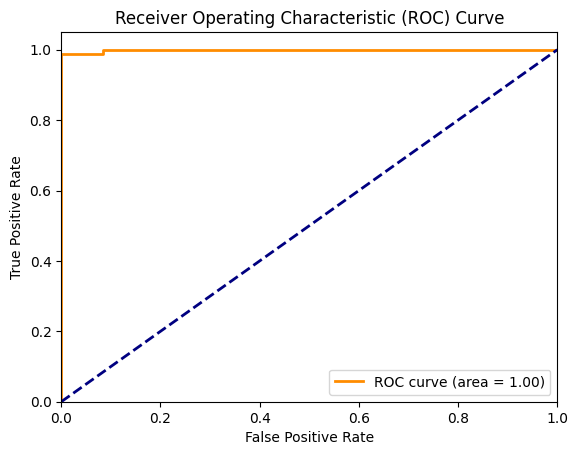

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

predictions = model.predict(X_test)  # Replace X_test with your test data
rounded_predictions = np.round(predictions)  # Convert to 0 or 1

# True labels
true_labels = y_test  # Replace y_test with your true labels

# Accuracy
accuracy = accuracy_score(true_labels, rounded_predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(true_labels, rounded_predictions)
print("Precision:", precision)

# Recall
recall = recall_score(true_labels, rounded_predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(true_labels, rounded_predictions)
print("F1-Score:", f1)

# ROC AUC
roc_auc = roc_auc_score(true_labels, predictions)
print("ROC AUC:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(true_labels, rounded_predictions)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## (=3) training on relu soley

In [ ]:
#OLDDDDDD deprecated code
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  #
model.add(layers.Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
Binary = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
22/22 [==============================] - 4s 80ms/step - loss: 4.0447 - accuracy: 0.7350 - val_loss: 3.4311 - val_accuracy: 0.7750
Epoch 2/10
22/22 [==============================] - 1s 58ms/step - loss: 4.0671 - accuracy: 0.7335 - val_loss: 3.4311 - val_accuracy: 0.7750
Epoch 3/10
22/22 [==============================] - 1s 58ms/step - loss: 3.8020 - accuracy: 0.7507 - val_loss: 3.4311 - val_accuracy: 0.7750
Epoch 4/10
22/22 [==============================] - 1s 60ms/step - loss: 3.8014 - accuracy: 0.7507 - val_loss: 3.4311 - val_accuracy: 0.7750
Epoch 5/10
22/22 [==============================] - 2s 70ms/step - loss: 3.8014 - accuracy: 0.7507 - val_loss: 3.4311 - val_accuracy: 0.7750
Epoch 6/10
22/22 [==============================] - 2s 85ms/step - loss: 3.8014 - accuracy: 0.7507 - val_loss: 3.4311 - val_accuracy: 0.7750
Epoch 7/10
22/22 [==============================] - 2s 83ms/step - loss: 3.8014 - accuracy: 0.7507 - val_loss: 3.4311 - val_accuracy: 0.7750
Epoch 8/10
22

4/4 [==============================] - 0s 48ms/step
Accuracy: 0.76
Precision: 0.76
Recall: 1.0
F1-Score: 0.8636363636363636
ROC AUC: 0.5
Confusion Matrix:
[[ 0 24]
 [ 0 76]]


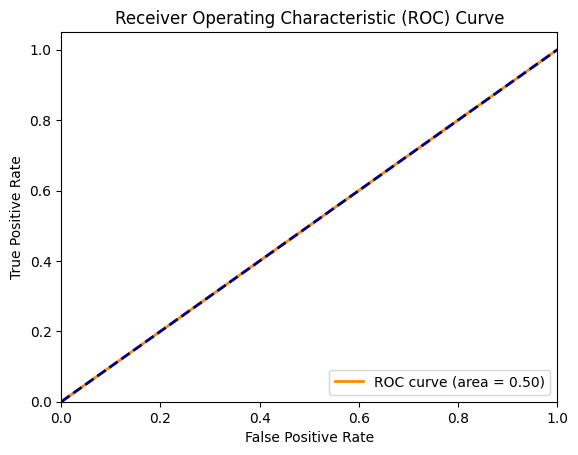

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

predictions = model.predict(X_test)  # Replace X_test with your test data
rounded_predictions = np.round(predictions)  # Convert to 0 or 1

# True labels
true_labels = y_test  # Replace y_test with your true labels

# Accuracy
accuracy = accuracy_score(true_labels, rounded_predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(true_labels, rounded_predictions)
print("Precision:", precision)

# Recall
recall = recall_score(true_labels, rounded_predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(true_labels, rounded_predictions)
print("F1-Score:", f1)

# ROC AUC
roc_auc = roc_auc_score(true_labels, predictions)
print("ROC AUC:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(true_labels, rounded_predictions)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## (=3) training on sigmoid soley

In [ ]:
#OLDDDDDD deprecated code
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dropout(0.5))  #
model.add(layers.Dense(1, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
Binary = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
22/22 [==============================] - 6s 131ms/step - loss: 1.9313 - accuracy: 0.7507 - val_loss: 1.4849 - val_accuracy: 0.7750
Epoch 2/10
22/22 [==============================] - 2s 73ms/step - loss: 1.3627 - accuracy: 0.7507 - val_loss: 0.9507 - val_accuracy: 0.7750
Epoch 3/10
22/22 [==============================] - 2s 72ms/step - loss: 0.8511 - accuracy: 0.7507 - val_loss: 0.5991 - val_accuracy: 0.7750
Epoch 4/10
22/22 [==============================] - 2s 73ms/step - loss: 0.6010 - accuracy: 0.7507 - val_loss: 0.5335 - val_accuracy: 0.7750
Epoch 5/10
22/22 [==============================] - 1s 68ms/step - loss: 0.5965 - accuracy: 0.7507 - val_loss: 0.5353 - val_accuracy: 0.7750
Epoch 6/10
22/22 [==============================] - 2s 75ms/step - loss: 0.5817 - accuracy: 0.7507 - val_loss: 0.5344 - val_accuracy: 0.7750
Epoch 7/10
22/22 [==============================] - 1s 66ms/step - loss: 0.5897 - accuracy: 0.7507 - val_loss: 0.5332 - val_accuracy: 0.7750
Epoch 8/10
2

4/4 [==============================] - 0s 64ms/step
Accuracy: 0.76
Precision: 0.76
Recall: 1.0
F1-Score: 0.8636363636363636
ROC AUC: 0.5
Confusion Matrix:
[[ 0 24]
 [ 0 76]]


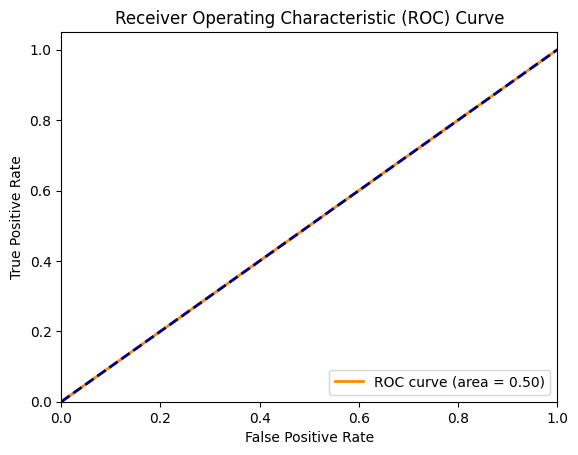

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

predictions = model.predict(X_test)  # Replace X_test with your test data
rounded_predictions = np.round(predictions)  # Convert to 0 or 1

# True labels
true_labels = y_test  # Replace y_test with your true labels

# Accuracy
accuracy = accuracy_score(true_labels, rounded_predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(true_labels, rounded_predictions)
print("Precision:", precision)

# Recall
recall = recall_score(true_labels, rounded_predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(true_labels, rounded_predictions)
print("F1-Score:", f1)

# ROC AUC
roc_auc = roc_auc_score(true_labels, predictions)
print("ROC AUC:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(true_labels, rounded_predictions)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## test against pretrained models

### VGG16 (Visual Geometry Group 16-layer)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pretrained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model by combining the base VGG16 and custom top layers
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
Binary = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
22/22 [==============================] - 2s 72ms/step - loss: 0.0025 - accuracy: 0.9986 - val_loss: 0.3062 - val_accuracy: 0.9600
Epoch 2/10
22/22 [==============================] - 1s 58ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3276 - val_accuracy: 0.9550
Epoch 3/10
22/22 [==============================] - 1s 67ms/step - loss: 7.0092e-04 - accuracy: 1.0000 - val_loss: 0.3413 - val_accuracy: 0.9550
Epoch 4/10
22/22 [==============================] - 1s 64ms/step - loss: 3.8891e-04 - accuracy: 1.0000 - val_loss: 0.3728 - val_accuracy: 0.9550
Epoch 5/10
22/22 [==============================] - 1s 57ms/step - loss: 3.0521e-04 - accuracy: 1.0000 - val_loss: 0.3774 - val_accuracy: 0.9550
Epoch 6/10
22/22 [==============================] - 1s 57ms/step - loss: 1.5603e-04 - accuracy: 1.0000 - val_loss: 0.4126 - val_accuracy: 0.9550
Epoch 7/10
22/22 [==============================] - 1s 56ms/step - loss: 1.1934e-04 - accuracy: 1.0000 - val_loss: 0.3970 - val_accuracy: 

4/4 [==============================] - 0s 74ms/step
Accuracy: 0.95
Precision: 0.9382716049382716
Recall: 1.0
F1-Score: 0.9681528662420382
ROC AUC: 0.9506578947368421
Confusion Matrix:
[[19  5]
 [ 0 76]]


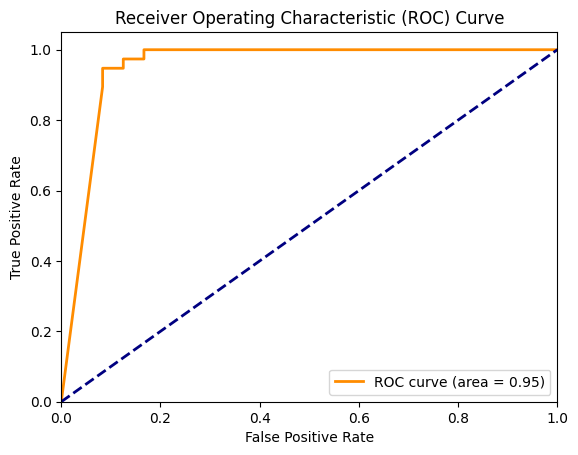

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

predictions = model.predict(X_test)  # Replace X_test with your test data
rounded_predictions = np.round(predictions)  # Convert to 0 or 1

# True labels
true_labels = y_test  # Replace y_test with your true labels

# Accuracy
accuracy = accuracy_score(true_labels, rounded_predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(true_labels, rounded_predictions)
print("Precision:", precision)

# Recall
recall = recall_score(true_labels, rounded_predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(true_labels, rounded_predictions)
print("F1-Score:", f1)

# ROC AUC
roc_auc = roc_auc_score(true_labels, predictions)
print("ROC AUC:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(true_labels, rounded_predictions)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#test against other architectures

### decision tree

In [ ]:
DX_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the images if cause images are multi-dimensional
DX_test = X_test.reshape(X_test.shape[0], -1)     # and decision trees need 1D format
DX_val = X_val.reshape(X_val.shape[0], -1)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already defined label_counts, X_train, X_val, X_test, y_train, y_val, and y_test as described in your initial question

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(DX_train, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(DX_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Print a classification report for more detailed evaluation
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = clf.predict(DX_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Print a classification report for the test set
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        45
           1       0.85      0.83      0.84       155

    accuracy                           0.76       200
   macro avg       0.66      0.67      0.67       200
weighted avg       0.77      0.76      0.76       200

Test Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.48      0.46      0.47        24
           1       0.83      0.84      0.84        76

    accuracy                           0.75       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.75      0.75      0.75       100



### ResNet50 (Residual Network 50-layer)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pretrained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create a new model by combining the base ResNet50 and custom top layers
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_resnet50.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
Binary = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
22/22 [==============================] - 2s 79ms/step - loss: 1.2570e-04 - accuracy: 1.0000 - val_loss: 0.5154 - val_accuracy: 0.9550
Epoch 2/10
22/22 [==============================] - 1s 57ms/step - loss: 0.1735 - accuracy: 0.9656 - val_loss: 0.2388 - val_accuracy: 0.9000
Epoch 3/10
22/22 [==============================] - 1s 58ms/step - loss: 1.4382 - accuracy: 0.8109 - val_loss: 0.3239 - val_accuracy: 0.8550
Epoch 4/10
22/22 [==============================] - 1s 58ms/step - loss: 0.2877 - accuracy: 0.8725 - val_loss: 0.2662 - val_accuracy: 0.8700
Epoch 5/10
22/22 [==============================] - 1s 63ms/step - loss: 0.2466 - accuracy: 0.9097 - val_loss: 0.1920 - val_accuracy: 0.9200
Epoch 6/10
22/22 [==============================] - 1s 63ms/step - loss: 0.1563 - accuracy: 0.9341 - val_loss: 0.2415 - val_accuracy: 0.8900
Epoch 7/10
22/22 [==============================] - 1s 58ms/step - loss: 0.0727 - accuracy: 0.9713 - val_loss: 0.4619 - val_accuracy: 0.9200
Epoch 8/1

4/4 [==============================] - 0s 17ms/step
Accuracy: 0.95
Precision: 0.9493670886075949
Recall: 0.9868421052631579
F1-Score: 0.967741935483871
ROC AUC: 0.9517543859649122
Confusion Matrix:
[[20  4]
 [ 1 75]]


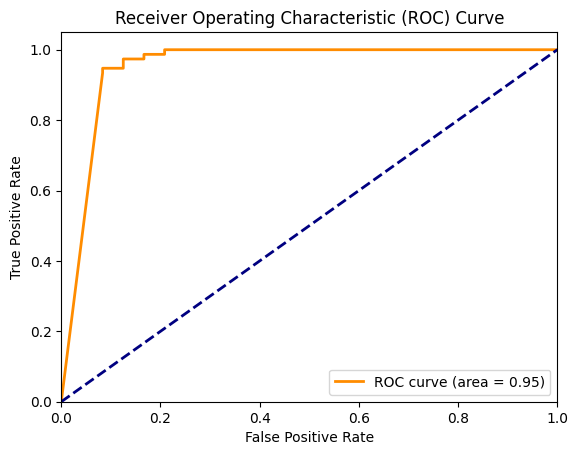

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

predictions = model.predict(X_test)  # Replace X_test with your test data
rounded_predictions = np.round(predictions)  # Convert to 0 or 1

# True labels
true_labels = y_test  # Replace y_test with your true labels

# Accuracy
accuracy = accuracy_score(true_labels, rounded_predictions)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(true_labels, rounded_predictions)
print("Precision:", precision)

# Recall
recall = recall_score(true_labels, rounded_predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(true_labels, rounded_predictions)
print("F1-Score:", f1)

# ROC AUC
roc_auc = roc_auc_score(true_labels, predictions)
print("ROC AUC:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(true_labels, rounded_predictions)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# legacy code

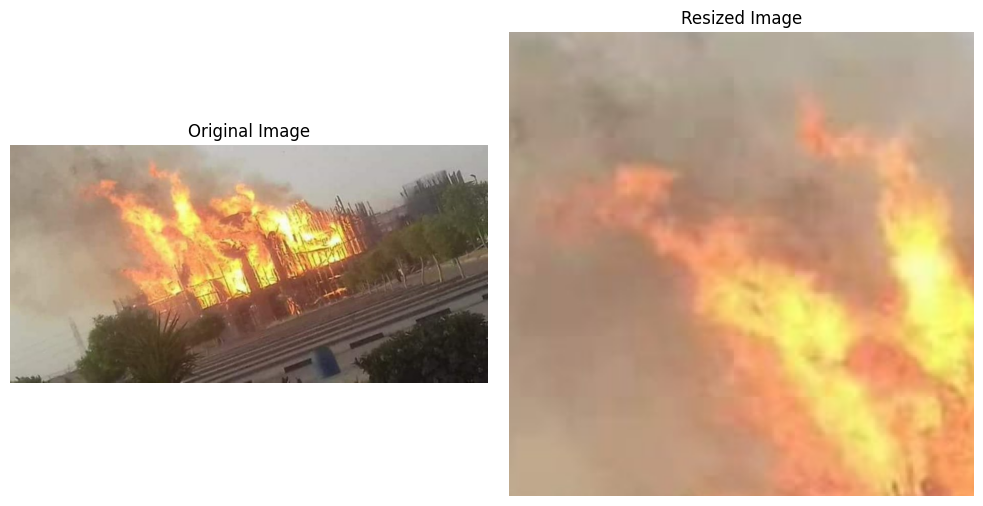

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image_val = 13

# Load the first image from fire_path
first_image_path = os.path.join(fire_path, os.listdir(fire_path)[image_val])
first_image = Image.open(first_image_path)

# Display the images side by side
plt.figure(figsize=(10, 5))  # Create a larger figure to display both images

# Display the first image from fire_path
plt.subplot(1, 2, 1)
plt.imshow(first_image)
plt.title("Original Image")
plt.axis('off')

# Display the second image from resized_fire_images
plt.subplot(1, 2, 2)
plt.imshow(resized_fire_images[image_val])
plt.title("Resized Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define your CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
category = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
22/22 [==============================] - 79s 4s/step - loss: 81.1279 - accuracy: 0.6633 - val_loss: 0.3842 - val_accuracy: 0.7850
Epoch 2/10
22/22 [==============================] - 74s 3s/step - loss: 0.3758 - accuracy: 0.8610 - val_loss: 0.1736 - val_accuracy: 0.9300
Epoch 3/10
22/22 [==============================] - 81s 4s/step - loss: 0.2007 - accuracy: 0.9284 - val_loss: 0.5402 - val_accuracy: 0.8950
Epoch 4/10
22/22 [==============================] - 74s 3s/step - loss: 0.2847 - accuracy: 0.9026 - val_loss: 0.5869 - val_accuracy: 0.8550
Epoch 5/10
22/22 [==============================] - 74s 3s/step - loss: 0.2139 - accuracy: 0.9054 - val_loss: 0.2108 - val_accuracy: 0.9450
Epoch 6/10
22/22 [==============================] - 92s 4s/step - loss: 0.1372 - accuracy: 0.9427 - val_loss: 0.3433 - val_accuracy: 0.8900
Epoch 7/10
22/22 [==============================] - 80s 4s/step - loss: 0.1877 - accuracy: 0.9327 - val_loss: 0.2647 - val_accuracy: 0.8950
Epoch 8/10
22/22 [=

In [ ]:
est_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 3s 568ms/step - loss: 0.3745 - accuracy: 0.8800
Test Loss: 0.2357802838087082
Test Accuracy: 0.8799999952316284


4/4 [==============================] - 3s 553ms/step


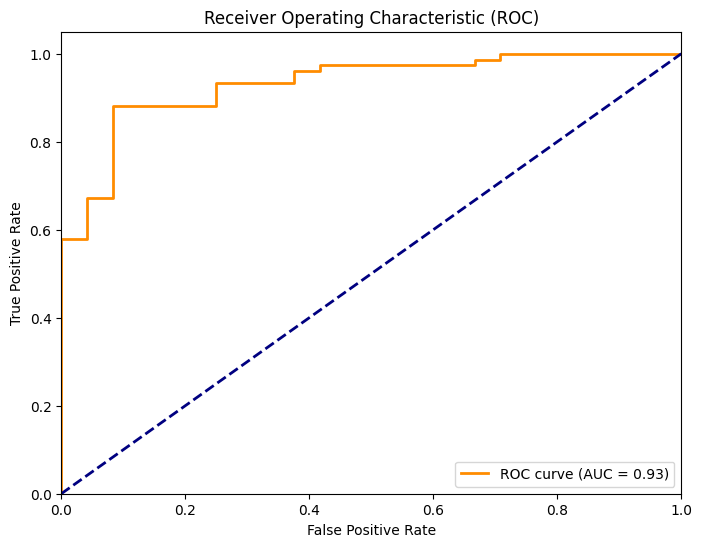

AUC: 0.9320175438596491


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have a separate test dataset (X_test, y_test)

# Get the model's predicted probabilities for the positive class
y_pred_prob = model.predict(X_test)[:, 1]  # Assuming the positive class is index 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC
print("AUC:", roc_auc)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation=tf.keras.layers.PReLU()))
model.add(layers.Dense(128, activation=tf.keras.layers.PReLU()))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#old labelling code (1 hot)
def load_images(path):
    images = []
    labels = []



    for class_folder in os.listdir(path):
        class_path = os.path.join(path, class_folder)
        class_label = 1 if class_folder == 'fire' else 0
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            image = tf.keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(class_label)


    return np.array(images), np.array(labels)
# Load and preprocess the images
Images, Labels = load_images(output_path)
# Convert labels to one-hot encoding
Labels = to_categorical(Labels, num_classes=2)